# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Salsa Tashfiyatul Qolbi
- **Email:** salsatash@gmail.com
- **ID Dicoding:** MC009D5X0875

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca & suhu terhadap jumlah penyewaan sepeda?
- Kapan waktu paling sibuk dan paling sepi dalam penyewaan sepeda berdasarkan jam, hari, dan musim?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

- Library NumPy digunakan untuk
- Library Pandas digunakan pengelolaan dan analisis data.
- Library Matplotlib digunakan untuk visualisasi data.
- Library Seaborn digunakan untuk visualisasi data sama seperti Matplotlib
Librari Zipfile digunakan untuk memanipulasi file ZIP

## Data Wrangling

### Gathering Data

#### Mendownload dataset menggunakan Kaggle API

In [2]:
!kaggle datasets download -d lakshmi25npathi/bike-sharing-dataset

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset
License(s): unknown
bike-sharing-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


#### Mengekstrak file ZIP bernama bike-sharing-dataset.zip ke dalam folder bernama bike_data.







In [3]:
with zipfile.ZipFile("bike-sharing-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("bike_data")

#### Memuat tabel hour

In [4]:
hour_df = pd.read_csv("bike_data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Memuat tabel day

In [5]:
day_df = pd.read_csv("bike_data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Berdasarkan kedua tabel di atas, didapatkan 17 data sebagai berikut:
1.   Instant: indeks dari record
2.   dteday: tanggal penyewaan
3. season: musim (1. Musim Semi, 2. Musim Panas, 3. Musim Gugur, 4. Musim Dingin)
4. yr: tahun (0: 2011, 1: 2012)
5. mnth: bulan (1 sampai 12)
6. hr: jam (0 sampai 23) kolom ini tidak ada pada tabel day
7. holiday: 1 jika libur, 0 jika tidak libur
8. weekday: 7 hari dalam 1 minggu
9. workingday: 1 jika tidak libur dan bukan akhir mimggu, 0 jika libur
10.  wethersit: (1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian)
(2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut)
(3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan Ringan + Awan berserakan)
(4: Hujan Lebat + Palet Es + Badai Petir + Kabut, Salju + Kabut)
11. temp: temperatur normal dalam celsius
12. atemp: menormalisasikan temperatur yang dirasakan dalam celsius
13. hum: mormalisasi kelembaban
14. windspeed: normalisasi kecepatan angin
15. casual: jumlah dari pengguna biasa
16. registered: jumlah pengguna terdaftar
17. cnt: jumlah total sepeda sewaan termasuk sepeda kasual dan terdaftar






### Assessing Data

#### Memeriksa data pada tabel hour

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print(hour_df.duplicated().sum())

0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
print(hour_df["season"].unique())
print(hour_df["weathersit"].unique())


[1 2 3 4]
[1 2 3 4]


In [10]:
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

outliers = hour_df[(hour_df["cnt"] < batas_bawah) | (hour_df["cnt"] > batas_atas)]
print(f"Jumlah Outlier: {outliers.shape[0]}")


Jumlah Outlier: 505


#### Memeriksa data pada tabel day

In [11]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [13]:
print(day_df.duplicated().sum())

0


In [14]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [15]:
print(day_df["season"].unique())
print(day_df["weathersit"].unique())


[1 2 3 4]
[2 1 3]


In [16]:
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

day_outliers = day_df[(day_df["cnt"] < batas_bawah) | (day_df["cnt"] > batas_atas)]
print(f"Jumlah Outlier: {day_outliers.shape[0]}")


Jumlah Outlier: 0


**Insight:**
- Pada kedua tabel tidak terdapat missing value.
- Terdapat kesalahan tipe data pada kedua tabel, yaitu pada kolom dteday yang bertipe object, seharusnya bertipe datetime.
- Tidak terdapat duplikasi data pada kedua tabel.
- Tidak terdapat inaccurate value pada kedua tabel.
- Terdapat inconsistent value pada kedua tabel. Pada kolom weathersit terdapat perbedaan data, dimana pada tabel hour terdapat 4 kategori, sedangkan pada tabel day hanya terdapat 3 kategori
- Terdapat outlier pada tabel hour

### Cleaning Data

#### Membersihkan data hour_df dan day_df
Proses ini dilakukan menggunakan Library Pandas dengan fucntion to_datetime. Selain mengganti tipe data, kode di bawah juga mengatur format penulisan tanggal, yaitu YYYY-MM-DD

In [17]:
datetime_columns = ["dteday"]
hour_df[datetime_columns] = hour_df[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")
day_df[datetime_columns] = day_df[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Memperbaiki Inconsistent Value
Proses ini dilakukan dengan menggunakan Library Pandas dengan method groupby()

Kode di bawah digunakan untuk mencetak jumlah dari masing-masing kategori di weathersit

In [20]:
print("Distribusi Weather di day.csv:")
print(day_df["weathersit"].value_counts())

print("\nDistribusi Weather di hour.csv:")
print(hour_df["weathersit"].value_counts())


Distribusi Weather di day.csv:
weathersit
1    463
2    247
3     21
Name: count, dtype: int64

Distribusi Weather di hour.csv:
weathersit
1    11413
2     4544
3     1419
4        3
Name: count, dtype: int64


Terlihat bahwa pada tabel day terdapat 3 kategori dan pada tabel hour terdapat 4 kategori

Kode di bawah digunakan untuk mencetak record mana yang memiliki kategori nomor 4 pada tabel hour, dan mencari record tersebut pada tabel day dan memeriksa apakah memilki kategori yang sama

In [21]:
days_with_weather_4 = hour_df[hour_df["weathersit"] == 4]["dteday"].unique()
print("Hari dengan Weather 4 di hour.csv:", days_with_weather_4)

days_in_day = day_df[day_df["dteday"].isin(days_with_weather_4)]
print("\nApakah ada di day.csv?", days_in_day)


Hari dengan Weather 4 di hour.csv: <DatetimeArray>
['2011-01-26 00:00:00', '2012-01-09 00:00:00', '2012-01-21 00:00:00']
Length: 3, dtype: datetime64[ns]

Apakah ada di day.csv?      instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
25        26 2011-01-26       1   0     1        0        3           1   
373      374 2012-01-09       1   1     1        0        1           1   
385      386 2012-01-21       1   1     1        0        6           0   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
25            3  0.217500  0.203600  0.862500   0.293850      34         472   
373           2  0.224167  0.247479  0.701667   0.098900     106        2270   
385           2  0.173333  0.174875  0.831250   0.222642      67        1234   

      cnt  
25    506  
373  2376  
385  1301  


Terlihat bahwa pada tabel hour terdapat 3 record yang memiliki kategori nomor 4, tetapi jika dicari pada tabel day, data tersebut memiliki ketegori yang berbeda

Kode di bawah digunakan untuk menghitung weathersit dari data hour.csv menggunakan modus (mode) atau persentase dominan.

In [22]:
day_weather_fixed = hour_df.groupby("dteday")["weathersit"].agg(lambda x: x.mode()[0])

day_df["weathersit"] = day_df["dteday"].map(day_weather_fixed)


In [23]:
print(day_df["weathersit"].unique())


[1 2 3]


#### Memperbaiki data outlier
Proses ini menggunakan metode imputation

In [24]:
hour_df["cnt"] = np.where(hour_df["cnt"] < batas_bawah, batas_bawah, hour_df["cnt"])
hour_df["cnt"] = np.where(hour_df["cnt"] > batas_atas, batas_atas, hour_df["cnt"])

In [25]:
hour_outliers = hour_df[(hour_df["cnt"] < batas_bawah) | (hour_df["cnt"] > batas_atas)]

print(f"Jumlah Outlier Setelah Perubahan: {hour_outliers.shape[0]}")


Jumlah Outlier Setelah Perubahan: 0


**Insight:**
- Tipe data pada kolom dteday sudah berubah, yang awalnya bertipe data object menjadi datetime
- Kedua tabel hanya memiliki 3 tipe data, yaitu integer, float, dan datetime
- Tidak terjadi perubahan pada perbaikan data, itu disebabkan karena pada proses agregasi data kategori 4 diabaikan karena jumlahnya sangat sedikit daripada kategori 1, 2, dan 3.
- Sudah tidak terdapat outlier pada tabel hour

## Exploratory Data Analysis (EDA)

### Explore Data day_df dan hour_df



#### Statistik Deskriptif Data hour_df dan day_df  

In [26]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [27]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.298222,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.550203,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


#### Distribusi Data Numerik dalam Data hour_df dan day_df

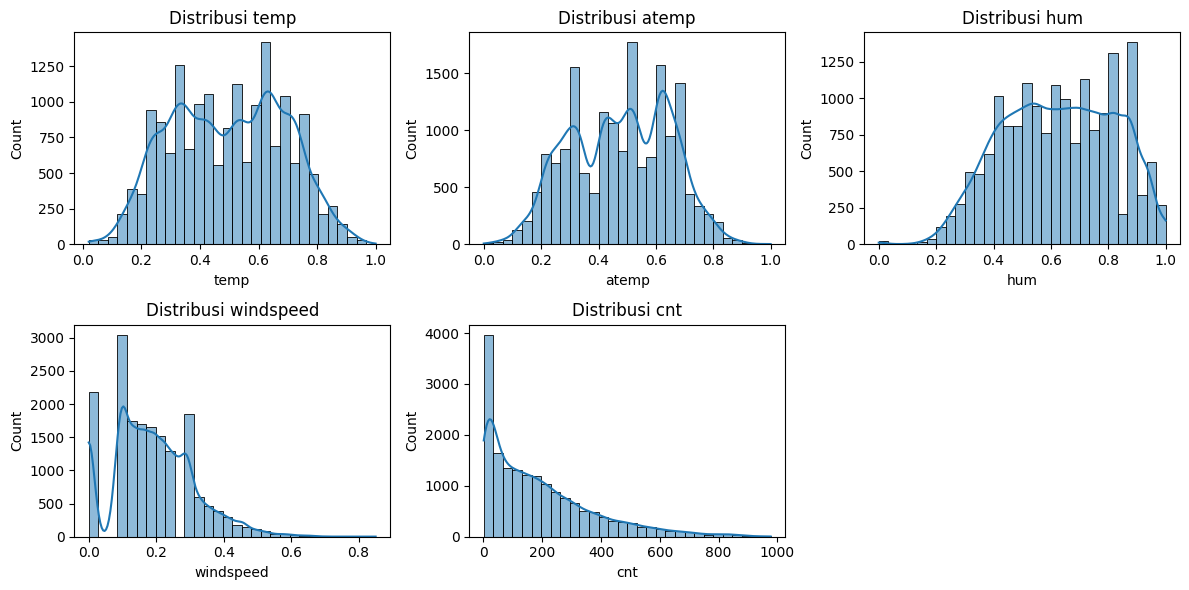

In [28]:
num_cols = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(hour_df[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

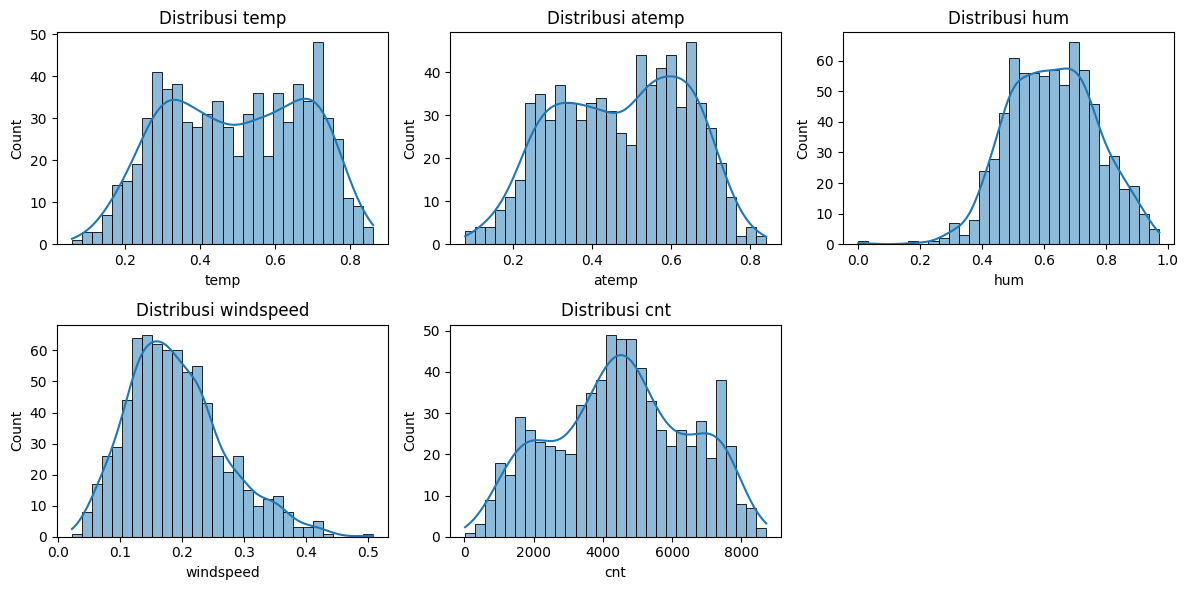

In [29]:
num_cols = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(day_df[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

**Insight**
- Variabel temp dan atemp memiliki distribusi yang mendekati normal.
- Variabel hum menunjukkan sedikit kemiringan ke kanan (right-skewed), sebagian besar nilai kelembaban berada di rentang 0.5 - 0.9
- Variabel windspeed dan cnt memiliki distribusi yang sangat skewed ke kanan. Namun pada data perhari, variabel cnt mendekati normal.

#### Analisis Statistik Berdasarkan Musim dalam Data hour_df dan day_df

In [30]:
hour_df.groupby(by="season").agg({
    "workingday": "count",
    "windspeed": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday", "count"), ascending=False)

workingday windspeed                          
            count       max  min      mean <lambda_0>
season                                               
3            4496    0.8507  0.0  0.171593     0.8507
2            4409    0.7164  0.0  0.203410     0.7164
1            4242    0.8060  0.0  0.215107     0.8060
4            4232    0.6418  0.0  0.170819     0.6418

In [31]:
day_df.groupby(by="season").agg({
    "workingday": "count",
    "windspeed": ["max", "min", "mean", lambda x: x.max() - x.min()]
}).sort_values(by=("workingday", "count"), ascending=False)

workingday windspeed                               
            count       max       min      mean <lambda_0>
season                                                    
3             188  0.375617  0.064071  0.172095   0.311546
2             184  0.388067  0.065929  0.203507   0.322138
1             181  0.507463  0.045408  0.214537   0.462055
4             178  0.422275  0.022392  0.171995   0.399883

**Insight:**

Analisis hari kerja bedasarkan 2 data (day_df dan hour_df)
- Musim gugur memiliki lebih banyak hari kerja dibandingkan musim lainnya.
- Musim dingin memiliki jumlah hari kerja lebih sedikit, bisa karena hari libur atau cuaca ekstrim.

Analisis kecepatan angin bedasarkan 2 data (day_df dan hour_df)
- Pada data perjam, kecepatan angin tertinggi berada pada musim gugur. Namun, pada data perhari, kecepatan angin tertinggi berada pada musim semi. Ini bisa berdampak pada kenyamanan bersepeda.

Perbandingan data perjam dan perhari
- Kecepatan angin maksimum di hour_df lebih besar dibandingkan day_df, kemungkinan karena fluktuasi angin lebih besar dalam periode waktu yang lebih kecil (jam).
- Nilai mean kecepatan angin (windspeed) hampir sama di hour_df dan day_df, menunjukkan bahwa rata-rata kecepatan angin tetap cukup stabil dalam skala harian maupun per jam.

#### Heatmap Korelasi Antar Variabel Numerik dalam Data hour_df dan day_df

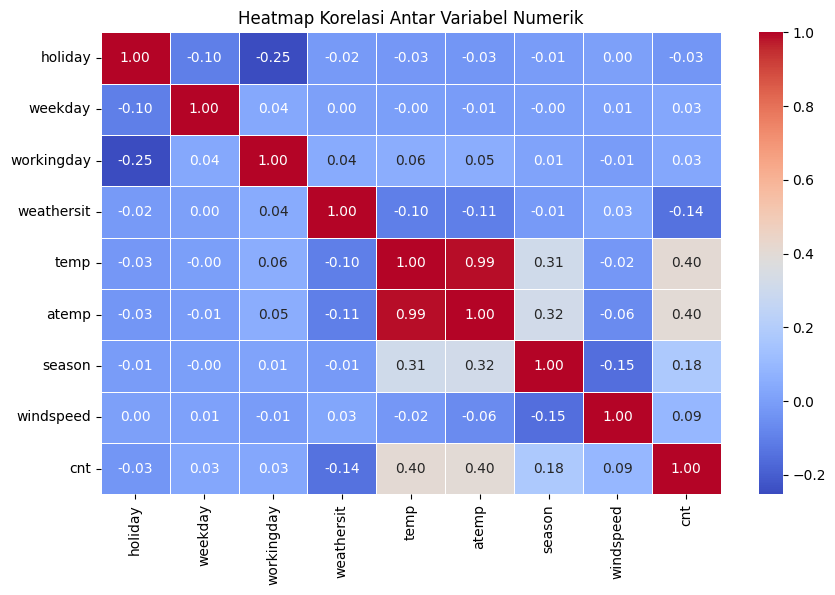

In [32]:
numerical_columns = ["holiday"
 ,"weekday","workingday","weathersit","temp","atemp","season", "windspeed",  "cnt"]
correlation = hour_df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

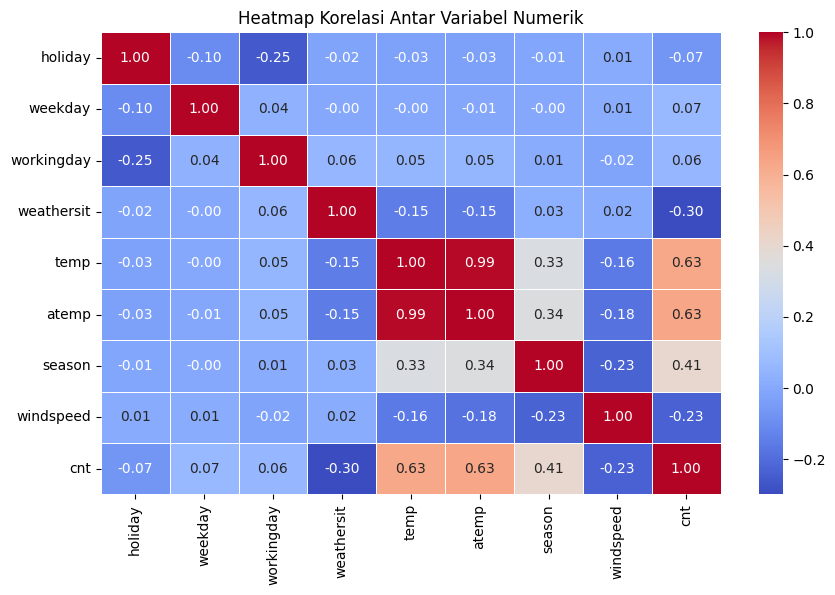

In [33]:
numerical_columns = ["holiday"
 ,"weekday","workingday","weathersit","temp","atemp","season", "windspeed",  "cnt"]
correlation = day_df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

**Insight**
Berdasarkan hasil agregasi sebelumnya, mari kita lihat korelasi antara cnt dengan windspeed dan korelasi antara weathersit dengan cnt. Dilihat dari kedua heatmap di atas menghasilkan hasil seperti berikut:
- Pada heatmap perjam, korelasi antara windspeed dengan cnt tidak memiliki pengaruh yang besar. Pada heatmap perhari,  korelasi antara windspeed dengan cnt memiliki korelasi negatif sebesar -0.23 yang artinya semakin besar angin maka semakin sedikit jumlah penyewa sepeda.
- Pada heatmap perjam, korelasi antara weathersit dengan cnt memiliki korelasi negatif sebesar -0.14 dan pada heatmap perhari, korelasi antara weathersit dengan cnt memiliki korelasi negatif sebesar -0.30 yang artinya semakin buruk kondisi cuaca maka semakin sedikit jumlah penyewa sepeda.
- Selain weathesit dan windspeed, atemp dan temp mempunyai korelasi dengan cnt. Terlihat pada heatmap, atemp dan temp mempunyai korelasi positif dengan cnt, yaitu sebesar 0.4 dan 0.63 yang artinya semakin tinggi suhu semakin banyak penyewaan sepeda.

Dari hasil tersebut dapat disimpulkan:
- Orang cenderung enggan bersepeda saat angin kencang karena bisa menghambat perjalanan dan mengurangi kenyamanan.
- Saat cuaca buruk (hujan, kabut, atau salju), jumlah penyewa sepeda akan turun secara signifikan.
- Cuaca buruk lebih berpengaruh dibanding angin kencang terhadap penyewaan sepeda.

#### Distribusi Kategori dari Variabel Season, Weathersit, dan Workingday dalam Data hour_df

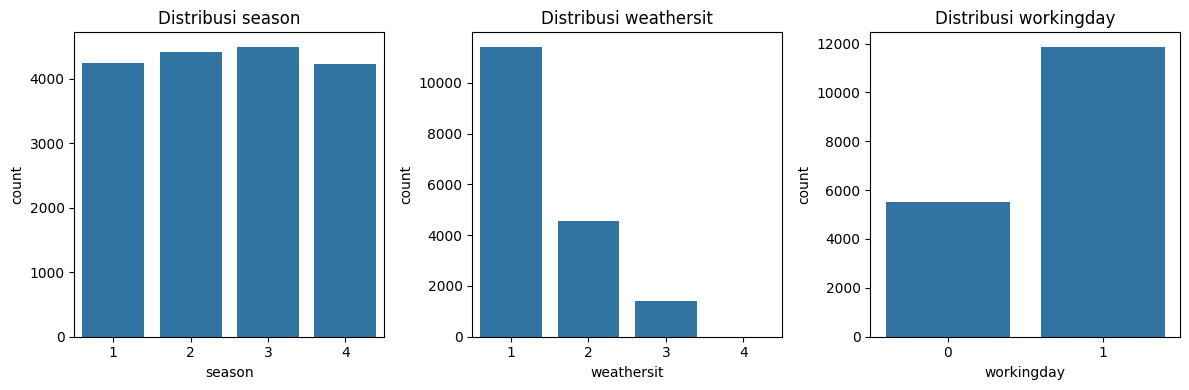

In [34]:
cat_cols = ["season", "weathersit", "workingday"]
plt.figure(figsize=(12, 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=hour_df[col])
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

**Insight**
Distribusi season
- Data terlihat hampir seimbang untuk setiap musim (1, 2, 3, dan 4), yang berarti jumlah sampel di setiap musim cukup merata.
- Ini menunjukkan bahwa dataset tidak berat sebelah terhadap musim tertentu.

Distribusi weathersit
- Mayoritas data berada di kategori cuaca 1 (cuaca cerah/berawan ringan).
- Kategori 2 (mendung) memiliki jumlah data yang lebih kecil, sedangkan kategori 3 (hujan ringan/salju ringan) lebih sedikit lagi.
- Kategori 4 (cuaca ekstrem, seperti badai) hampir tidak ada datanya, yang masuk akal karena orang cenderung tidak menyewa sepeda dalam kondisi cuaca buruk.

Distribusi Hari Kerja (workingday)
- Data lebih banyak pada kategori 1 (hari kerja) dibandingkan 0 (hari libur).
- Ini bisa berarti bahwa dataset memiliki lebih banyak data yang dikumpulkan pada hari kerja dibandingkan hari libur.

Kesimpulan:

- Data cukup merata untuk setiap musim, sehingga tidak ada musim yang terlalu dominan dalam dataset.
- Sebagian besar penyewaan terjadi dalam cuaca baik (kategori 1).
- Dataset lebih banyak mencakup hari kerja dibandingkan hari libur, yang akan mempengaruhi pola penyewaan sepeda.

#### Visualisasi Perbandingan antara Variabel cnt dan Windspeed

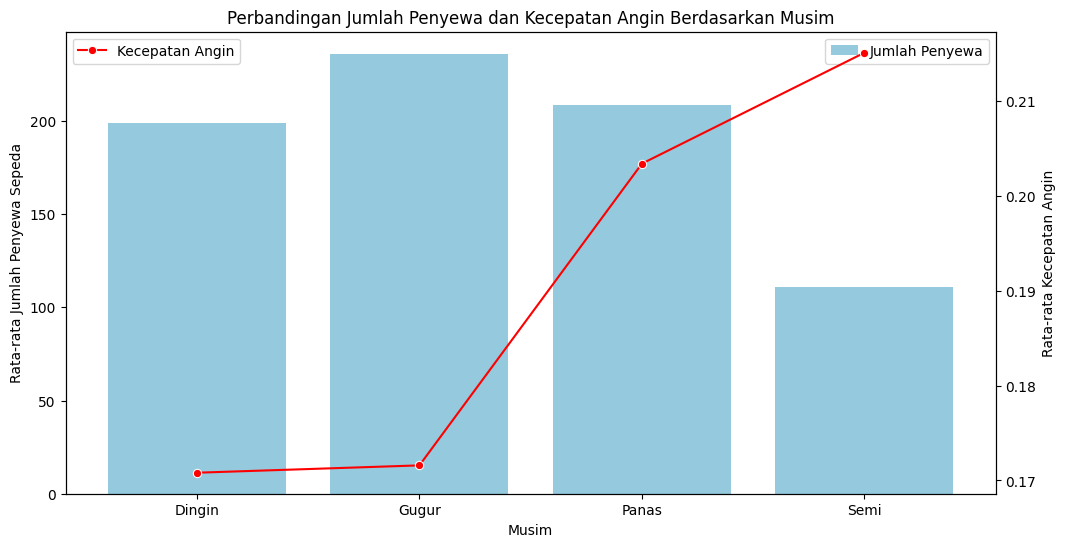

In [35]:
plt.figure(figsize=(12, 6))
season_labels = {1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin"}
hour_df["season_label"] = hour_df["season"].map(season_labels)
season_grouped = hour_df.groupby("season_label")[["cnt", "windspeed"]].mean().reset_index()

ax = sns.barplot(x="season_label", y="cnt", data=season_grouped, color="skyblue", label="Jumlah Penyewa")
ax2 = ax.twinx()
sns.lineplot(x="season_label", y="windspeed", data=season_grouped, marker="o", color="red", label="Kecepatan Angin", ax=ax2)
ax.set_ylabel("Rata-rata Jumlah Penyewa Sepeda")
ax2.set_ylabel("Rata-rata Kecepatan Angin")
ax.set_xlabel("Musim")
ax.set_title("Perbandingan Jumlah Penyewa dan Kecepatan Angin Berdasarkan Musim")
plt.legend()
plt.show()

**Insight**
- Musim gugur adalah musim terbaik untuk penyewaan sepeda dalam dataset ini.
- Kecepatan angin tinggi (musim semi) berpengaruh negatif terhadap jumlah penyewa sepeda.
- Musim panas dan dingin memiliki jumlah penyewa yang cukup tinggi, meskipun ada faktor-faktor lain seperti suhu yang  berperan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor cuaca & suhu terhadap jumlah penyewaan sepeda?

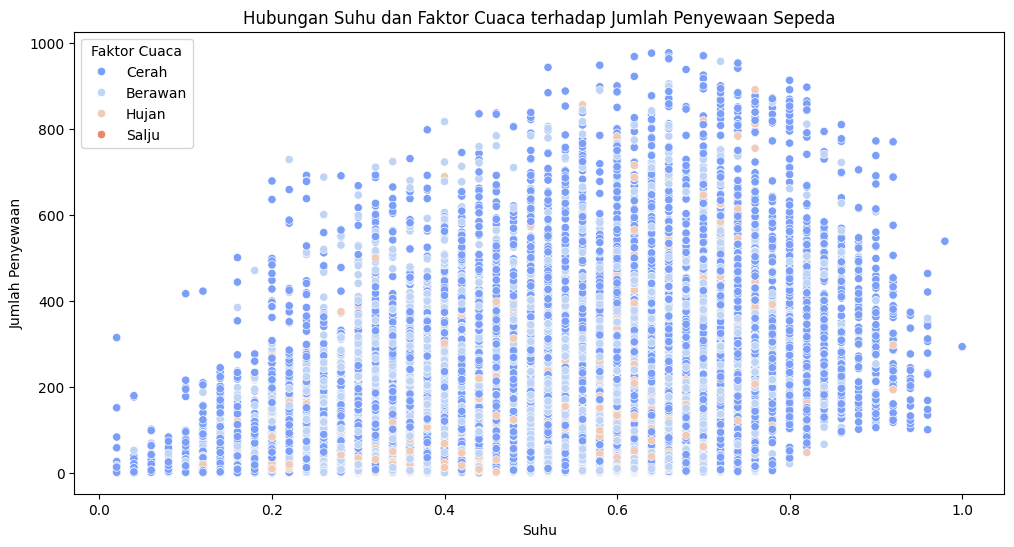

In [36]:
weather_labels = {1: "Cerah", 2: "Berawan", 3: "Hujan", 4: "Salju"}

hour_df['weathersit_label'] = hour_df['weathersit'].map(weather_labels)

plt.figure(figsize=(12,6))
sns.scatterplot(
    x=hour_df['temp'],
    y=hour_df['cnt'],
    hue=hour_df['weathersit_label'],
    palette="coolwarm"
)
plt.title("Hubungan Suhu dan Faktor Cuaca terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title="Faktor Cuaca")
plt.show()


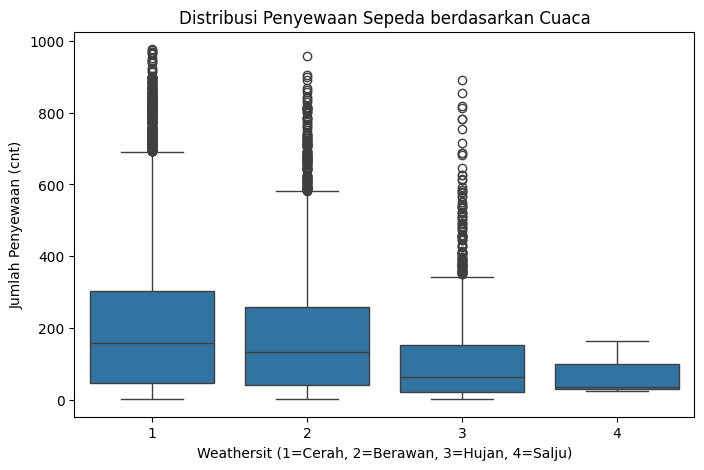

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x=hour_df['weathersit'], y=hour_df['cnt'])
plt.title("Distribusi Penyewaan Sepeda berdasarkan Cuaca")
plt.xlabel("Weathersit (1=Cerah, 2=Berawan, 3=Hujan, 4=Salju)")
plt.ylabel("Jumlah Penyewaan (cnt)")
plt.show()


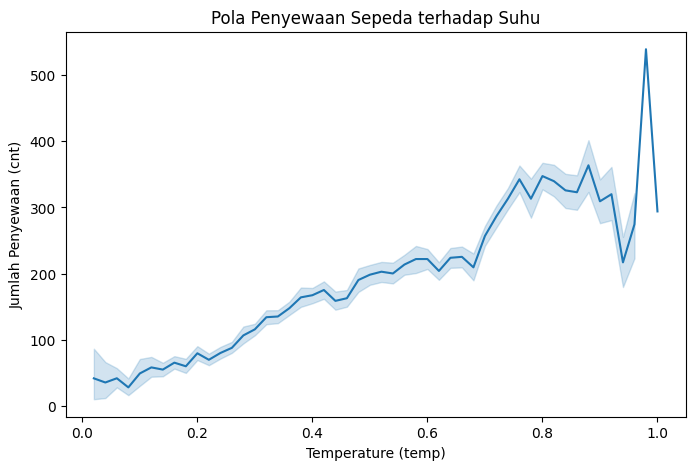

In [38]:
plt.figure(figsize=(8,5))
sns.lineplot(x=hour_df['temp'], y=hour_df['cnt'])
plt.title("Pola Penyewaan Sepeda terhadap Suhu")
plt.xlabel("Temperature (temp)")
plt.ylabel("Jumlah Penyewaan (cnt)")
plt.show()


#### Insight:
Bedasarkan scatterplot, boxplot, dan lineplot didapat kesimpulan:
- Data tersebar cukup luas, tetapi tetap mengikuti pola bahwa suhu yang lebih tinggi mendorong peningkatan penyewaan sepeda.
- Penyewaan lebih tinggi saat cuaca cerah.
- Ada hubungan positif antara suhu dan jumlah penyewaan, tetapi tidak linier sempurna (karena faktor cuaca juga berpengaruh).
- Pada cuaca bersalju cenderung ada penurunan penyewaan sepeda.
- Suhu sangat berpengaruh pada penyewaan sepeda, suhu lebih hangat mendorong lebih banyak orang menyewa sepeda.
- Pada suhu yang sangat rendah atau sangat tinggi, penyewaan sepeda tetap ada, tetapi jumlahnya lebih bervariasi.

### Pertanyaan 2: Kapan waktu paling sibuk dan paling sepi dalam penyewaan sepeda berdasarkan jam, hari, dan musim?

<ipython-input-39-1925a44b38c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hour_df['hr'], y=hour_df['cnt'], palette="coolwarm")


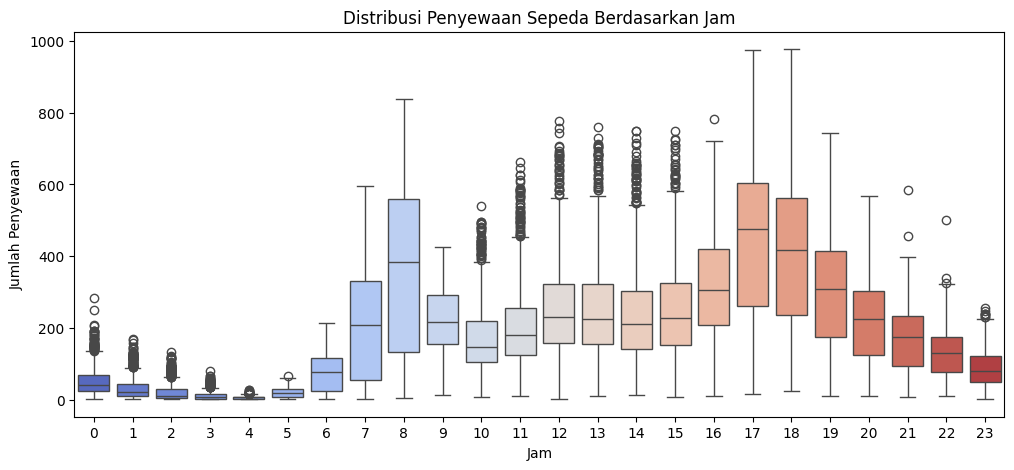

<ipython-input-39-1925a44b38c1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=day_df['weekday'], y=day_df['cnt'], palette="coolwarm")


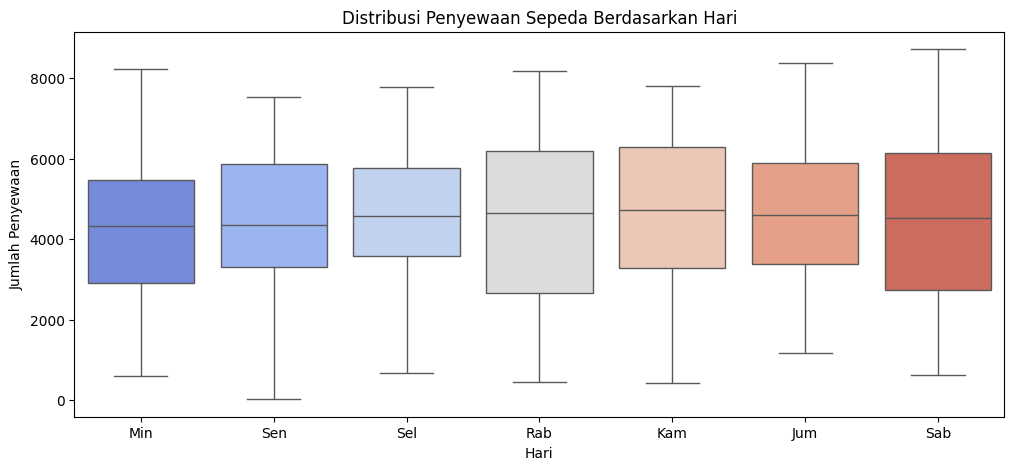

<ipython-input-39-1925a44b38c1>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=hour_df['season'], y=hour_df['cnt'],palette="coolwarm")


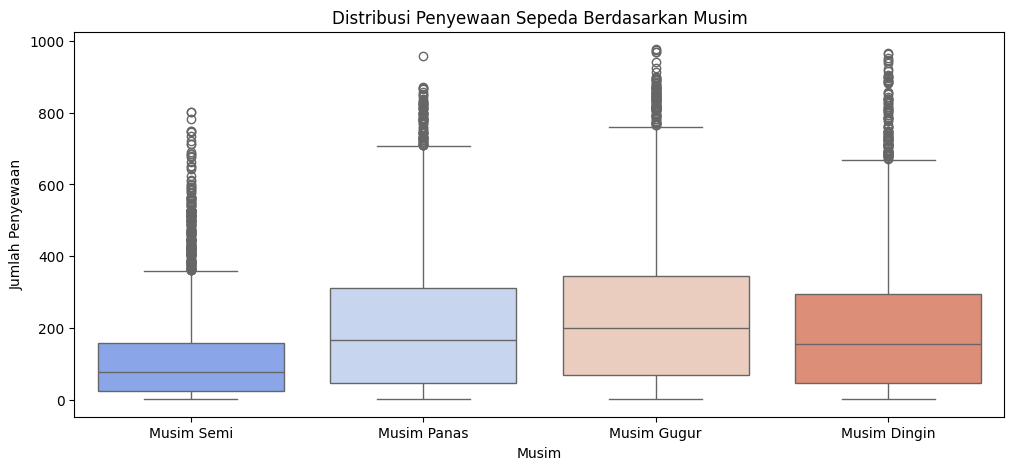

In [39]:
plt.figure(figsize=(12,5))
sns.boxplot(x=hour_df['hr'], y=hour_df['cnt'], palette="coolwarm")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=day_df['weekday'], y=day_df['cnt'], palette="coolwarm")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=["Min", "Sen", "Sel", "Rab", "Kam", "Jum", "Sab"])
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x=hour_df['season'], y=hour_df['cnt'],palette="coolwarm")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Musim Semi", "Musim Panas", "Musim Gugur", "Musim Dingin"])
plt.show()


**Insight:**

  Boxplot distribusi penyewaan sepeda berdasarkan jam:

- Penyewaan cenderung rendah saat dini hari dan mulai meningkat di jam 8 pagi dan 17 sore
- Pada siang hari penyewaan sepeda cenderung stabil.

Boxplot penyewaan sepeda berdasarkan hari

- tidak ada perbedaan signifikan antar hari, yang menunjukan bahwa penyewaan cukup merata setiap harinya

Boxplot distribusi penyewaan sepeda berdasarkan musim

- Musim semi memiliki lebih banyak oulier dibandingkan musim lain yang jumlah penyewaannya lebih stabil.
- Musim semi menjadi musim dengan penyewaan sepeda terendah.


## Conclusion

#### Conclution pertanyaan 1
- Suhu dan cuaca berpengaruh terhadap jumlah penyewaan sepeda.
- Cuaca yang baik dan suhu yang hangat cenderung meningkatkan jumlah penyewaan.
- Ini menunjukan bahwa bisnis penyewaan sepeda bisa memaksimalkan keuntungan dengan menargetkan promosi atau diskon pada hari-hari dengan cuaca buruk untuk menarik lebih banyak pelanggan.
- Penyedia layanan memastikan ketersediaan sepeda yang lebih tinggi pada hari-hari yang cerah dan hangat.

#### Conclution pertanyaan 2
- Waktu tersibuk untuk penyewaan sepeda terjadi di pagi hari sampai sore hari saat jam kerja dan saat musim gugur dan panas.
- Ini menunjukan bahwa banyak pengguna yang menggunakan sepeda sebagai transportasi untuk bekerja atau beraktivitas di luar rumah saat cuaca mendukung.
- Waktu paling sepi untuk penyewaan sepeda terjadi pada dini hari dan saat musim semi.

#### Conclution gabungan
**Rekomendasi & Tindakan:**
- Optimalisasi jumlah sepeda: Tambahkan lebih banyak sepeda dan pastikan ketersediaan di pagi dan sore hari.
- Promosi musiman: Tawarkan diskon atau program loyalitas saat musim hujan atau cuaca dingin untuk menjaga tingkat penyewaan.
- Strategi harga dinamis: Terapkan harga berbeda berdasarkan jam sibuk dan non-sibuk untuk mengoptimalkan keuntungan dan distribusi sepeda.
- Peningkatan pemasaran saat musim semi: Luncurkan kampanye pemasaran untuk menarik lebih banyak pelanggan di musim semi dengan diskon atau acara komunitas.
